<a href="https://colab.research.google.com/github/InsightfulSantosh/ML_Algo_from_scratch/blob/main/Gradient_Descent_Regressor_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent in Linear Regression::**

##**cost function or loss function**
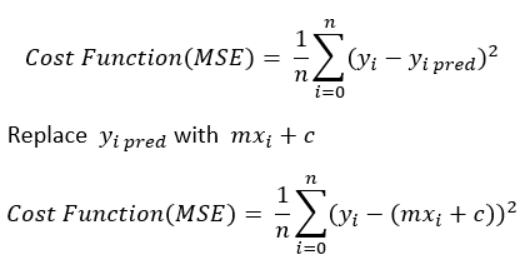


### **Step-by-Step Algorithm for Gradient Descent in Linear Regression**

1. **Initialization**:
   - Initialize the slope ($m$) and y-intercept ($c$) parameters to 0.
   - Set the learning rate ($L$), a small positive value like 0.01, which controls the step size of gradient descent.

2. **Compute Partial Derivatives**:
   - Calculate the partial derivative of the Cost function with respect to $m$, denoted as $Dm$, which represents how much the Cost function changes with a small change in $m$.
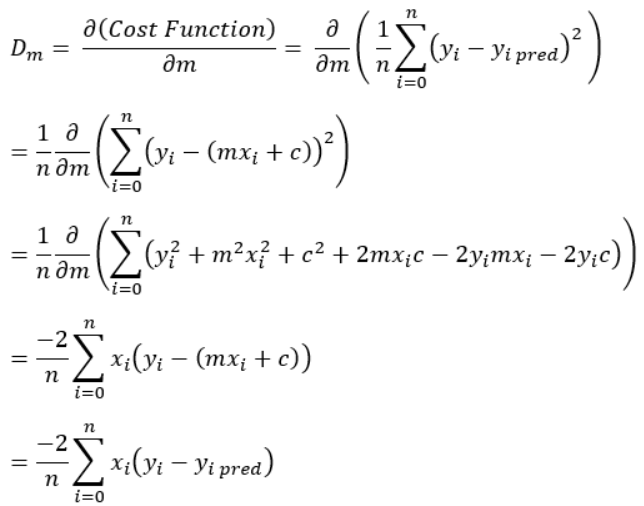

   - Similarly, compute the partial derivative of the Cost function with respect to $c$, denoted as $Dc$, representing the change in the Cost function with respect to a small change in $c$.
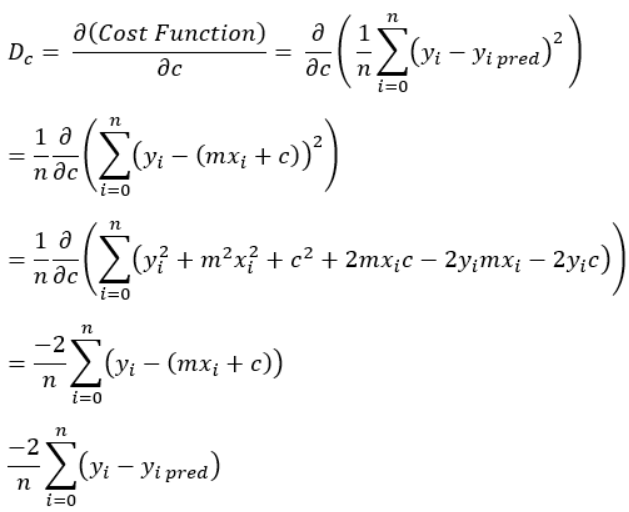

3. **Update Parameters**:
   - Update the current values of $m$ and $c$ using the following equations:
     - $m = m - L \cdot Dm$
     - $c = c - L \cdot Dc$

4. **Iteration**:
   - Repeat steps 2 and 3 until the Cost function becomes very small (ideally 0), indicating convergence.

### Explanation:

- **Initialization**: Start with initial values for the parameters ($m$ and $c$) and the learning rate ($L$).
- **Partial Derivatives**: Compute the gradients (partial derivatives) of the Cost function with respect to the parameters ($m$ and $c$). These gradients indicate the direction and magnitude of the steepest ascent.
- **Update Parameters**: Adjust the parameters ($m$ and $c$) in the direction of the negative gradient multiplied by the learning rate. This step ensures that we move towards the minimum of the Cost function.
- **Iteration**: Iterate through steps 2 and 3 until the Cost function reaches a minimum value, indicating that the parameters have converged to optimal values for the linear regression model.

This algorithm efficiently updates the parameters of the linear regression model to minimize the Cost function and improve the accuracy of predictions.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import SGDRegressor
# Load and prepare the dataset
df = pd.read_csv("/content/kc_house_data.csv")
dell = ["id", "date"]
df = df.drop(dell, axis=1).dropna()

X = df.drop(columns="price", axis=1)  # Features
y = df["price"]  # Target (house price)

# Split data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

# Feature Scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

## 1. **Batch Gradient Descent**:
   In batch gradient descent, the gradients are computed using the entire dataset. For every update, the gradients $\frac{\partial J}{\partial \mathbf{w}}$ and $\frac{\partial J}{\partial b}$ are computed using all $m$ training examples:

   - **Gradient computation**:
     $$
     \frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right) \mathbf{X}^{(i)}
     $$
     $$
     \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)
     $$

   - **Update rule**:
     $$
     \mathbf{w} = \mathbf{w} - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right) \mathbf{X}^{(i)}
     $$
     $$
     b = b - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)
     $$

   - **Pros**:
     - Converges to the global minimum (if the cost function is convex).
   - **Cons**:
     - Can be slow, especially for large datasets.

## **Custom Batch Gradient Descent Linear Regression Model**

In [33]:
# Custom Gradient Descent Linear Regression Model
class GradientLR:
    def __init__(self, epochs=100, lr=0.01):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.lr = lr

    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.coef_ = np.zeros(n_features)  # Initialize coefficients
        self.intercept_ = 0  # Initialize intercept

        for _ in range(self.epochs):
            y_pred = np.dot(x, self.coef_) + self.intercept_
            # Calculate gradients
            d_coef = (-1 / n_samples) * np.dot(x.T, (y - y_pred))
            d_intercept = (-1 / n_samples) * np.sum(y - y_pred)

            # Update coefficients and intercept
            self.coef_ -= self.lr * d_coef
            self.intercept_ -= self.lr * d_intercept

        return self.coef_, self.intercept_

    def predict(self, x):
        return np.dot(x, self.coef_) + self.intercept_

In [55]:
# Train and Predict using Custom Model
custom_model = GradientLR(epochs=500, lr=0.01)
custom_model.fit(train_x_scaled, train_y)
custom_predictions = custom_model.predict(test_x_scaled)

# Compute R^2 score and MSE for Custom Model
custom_r2_score = r2_score(test_y, custom_predictions)
custom_mse = mean_squared_error(test_y, custom_predictions)

print(f"Custom Model - R^2 Score: {custom_r2_score:.4f}")
print(f"Custom Model - Mean Squared Error: {custom_mse:.4f}")

# Train and Predict using SGDRegressor
sgd_model = SGDRegressor(max_iter=500, tol=1e-3,eta0=.01)
sgd_model.fit(train_x_scaled, train_y)
sgd_predictions = sgd_model.predict(test_x_scaled)

# Compute R^2 score and MSE for SGDRegressor
sgd_r2_score = r2_score(test_y, sgd_predictions)
sgd_mse = mean_squared_error(test_y, sgd_predictions)

print(f"SGDRegressor - R^2 Score: {sgd_r2_score:.4f}")
print(f"SGDRegressor - Mean Squared Error: {sgd_mse:.4f}")

Custom Model - R^2 Score: 0.6982
Custom Model - Mean Squared Error: 36697898542.4250
SGDRegressor - R^2 Score: 0.6966
SGDRegressor - Mean Squared Error: 36895929007.9637


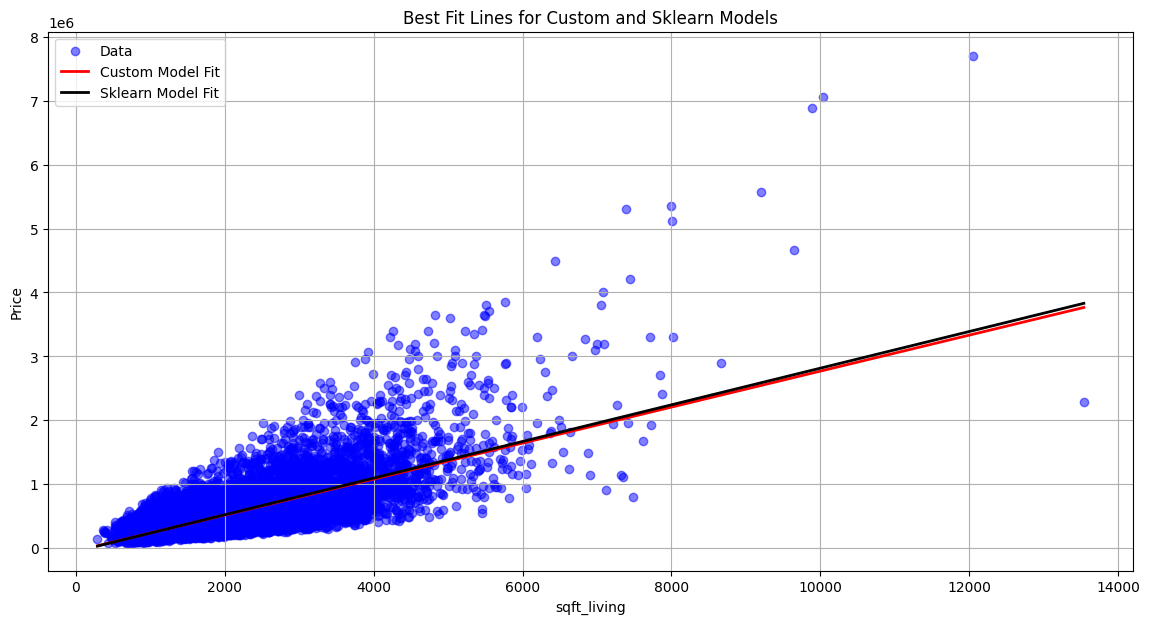

In [54]:
# Load and prepare the dataset
df1 = pd.read_csv("/content/kc_house_data.csv")
dell = ["id", "date"]
df1 = df1.drop(dell, axis=1).dropna()

# Select a single feature for demonstration
feature = 'sqft_living'  # Example feature
x1= df[[feature]]  # Features
y1 = df["price"]  # Target (house price)

# Split data into training and test sets
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1, y1, test_size=0.2, random_state=4)

# Feature Scaling
scaler = StandardScaler()
train_x_scaled1 = scaler.fit_transform(train_x1)
test_x_scaled1 = scaler.transform(test_x1)
# Train both models
custom_model = GradientLR(epochs=500, lr=0.01)
custom_model.fit(train_x_scaled1, train_y1)

sgd_model = SGDRegressor(max_iter=500, tol=1e-3,eta0=0.01)
sgd_model.fit(train_x_scaled1, train_y1)

# Make predictions using the entire feature range for plotting
X_range1 = np.linspace(train_x_scaled1.min(), train_x_scaled1.max(), 100).reshape(-1, 1)
X_range_original1 = scaler.inverse_transform(X_range1)  # Transform back to original scale

# Predict using both models
custom_predictions = custom_model.predict(X_range1)
sklearn_predictions = sgd_model.predict(X_range1)

# Plotting
plt.figure(figsize=(14, 7))

# Plot the original data
plt.scatter(train_x1, train_y1, color='blue', label='Data', alpha=0.5)

# Plot the best fit lines
plt.plot(X_range_original1, custom_predictions, color='red', label='Custom Model Fit', linewidth=2)
plt.plot(X_range_original1, sklearn_predictions, color='black', label='Sklearn Model Fit', linewidth=2)

plt.xlabel(feature)
plt.ylabel('Price')
plt.title('Best Fit Lines for Custom and Sklearn Models')
plt.legend()
plt.grid(True)
plt.show()

------------------------------------------
---------------------------

# 2. **Stochastic Gradient Descent (SGD)**:
In stochastic gradient descent, the parameters are updated after computing the gradient using a single training example. This results in more frequent updates but more noise during the updates.

- **Gradient computation**:
For a randomly selected training example $i$:
$$
\frac{\partial J}{\partial \mathbf{w}} = \left( \hat{y}^{(i)} - y^{(i)} \right) \mathbf{X}^{(i)}
$$
$$
\frac{\partial J}{\partial b} = \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

- **Update rule**:
$$
\mathbf{w} = \mathbf{w} - \alpha \left( \hat{y}^{(i)} - y^{(i)} \right) \mathbf{X}^{(i)}
$$
$$
b = b - \alpha \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

   - **Pros**:
     - Faster iterations since only one sample is used.
     - Good for large datasets.
   - **Cons**:
     - The cost function may fluctuate around the minimum instead of converging smoothly.





##**Custom Stochastic Gradient Descent (SGD)**

In [36]:
class MySGDRegressor:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Check if X and y are pandas DataFrame/Series, convert them to numpy arrays if necessary
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        # Initialize weights (coef_) and bias (intercept_)
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)  # Initialize coefficients to zero
        self.intercept_ = 0  # Initialize intercept to zero

        # Perform Stochastic Gradient Descent
        for _ in range(self.n_iterations):
            for idx in range(n_samples):
                random_index = np.random.randint(0, n_samples)  # Randomly pick one sample
                X_i = X[random_index]  # Feature vector of the chosen sample
                y_i = y[random_index]  # Target value of the chosen sample

                # Predicted value for the chosen sample
                y_hat = np.dot(X_i, self.coef_) + self.intercept_

                # Compute the error (residual)
                error = y_i - y_hat

                # Update the intercept and coefficients using the gradient of the loss function
                self.intercept_ += self.learning_rate * error  # Update intercept (bias term)
                self.coef_ += self.learning_rate * error * X_i  # Update coefficients

        return self.coef_  , self.intercept_

    def predict(self, X):
        # Check if X is a pandas DataFrame, convert to numpy array
        if isinstance(X, pd.DataFrame):
            X = X.values

        # Prediction: y_hat = X . coef_ + intercept_
        return np.dot(X, self.coef_) + self.intercept_

    def score(self, X, y):
        # Check if X and y are pandas DataFrame/Series, convert to numpy arrays if necessary
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        y_pred = self.predict(X)
        # Calculate the R-squared score: 1 - (sum((y_true - y_pred)^2) / sum((y_true - mean(y_true))^2))
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        r2_score = 1 - (ss_residual / ss_total)
        return r2_score


In [44]:

custom_model=MySGDRegressor(learning_rate=0.001,n_iterations=50)
custom_model.fit(train_x_scaled,train_y)

(array([-47180.99517139,  34492.8932018 ,  87731.68312864,    639.11070474,
         -4890.20383098,  54923.85085479,  42262.96736924,  12570.98761201,
        108134.74346045,  84648.89269085,  24357.12168791, -79438.22879618,
         -2224.19157004, -37574.41453611,  84997.50397489, -31787.32929969,
          9879.94040028, -11203.78861418]),
 541239.886925577)

In [45]:
custom_predictions = custom_model.predict(test_x_scaled)
# Compute R^2 score and MSE for Custom Model
custom_r2_score = r2_score(test_y, custom_predictions)
custom_mse = mean_squared_error(test_y, custom_predictions)

print(f"Custom Model - R^2 Score: {custom_r2_score:.4f}")
print(f"Custom Model - Mean Squared Error: {custom_mse:.4f}")

# Train and Predict using SGDRegressor
sgd_model = SGDRegressor(max_iter=50, tol=1e-3)
sgd_model.fit(train_x_scaled, train_y)
sgd_predictions = sgd_model.predict(test_x_scaled)

# Compute R^2 score and MSE for SGDRegressor
sgd_r2_score = r2_score(test_y, sgd_predictions)
sgd_mse = mean_squared_error(test_y, sgd_predictions)

print(f"SGDRegressor - R^2 Score: {sgd_r2_score:.4f}")
print(f"SGDRegressor - Mean Squared Error: {sgd_mse:.4f}")

Custom Model - R^2 Score: 0.6963
Custom Model - Mean Squared Error: 36932138507.6060
SGDRegressor - R^2 Score: 0.6974
SGDRegressor - Mean Squared Error: 36795569572.8580


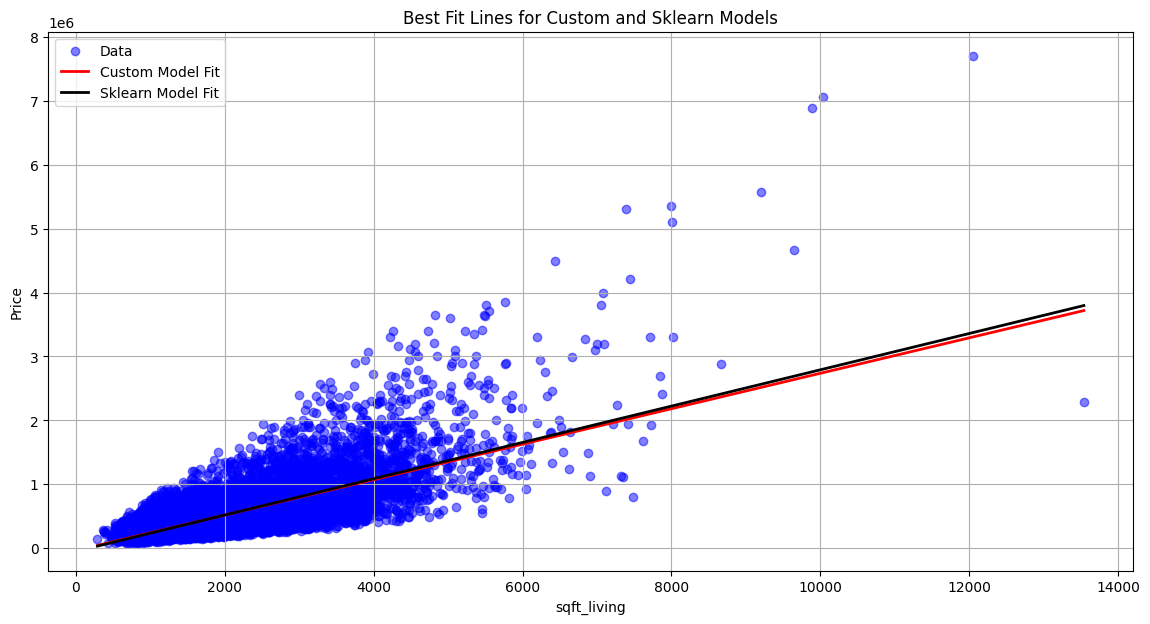

In [56]:

# Train both models
custom_model = MySGDRegressor(learning_rate=0.001,n_iterations=50)
custom_model.fit(train_x_scaled1, train_y1)

sgd_model = SGDRegressor(max_iter=50, tol=1e-3,eta0=.001)
sgd_model.fit(train_x_scaled1, train_y1)

# Make predictions using the entire feature range for plotting
X_range1 = np.linspace(train_x_scaled1.min(), train_x_scaled1.max(), 100).reshape(-1, 1)
X_range_original1 = scaler.inverse_transform(X_range1)  # Transform back to original scale

# Predict using both models
custom_predictions = custom_model.predict(X_range1)
sklearn_predictions = sgd_model.predict(X_range1)

# Plotting
plt.figure(figsize=(14, 7))

# Plot the original data
plt.scatter(train_x1, train_y1, color='blue', label='Data', alpha=0.5)

# Plot the best fit lines
plt.plot(X_range_original1, custom_predictions, color='red', label='Custom Model Fit', linewidth=2)
plt.plot(X_range_original1, sklearn_predictions, color='black', label='Sklearn Model Fit', linewidth=2)

plt.xlabel(feature)
plt.ylabel('Price')
plt.title('Best Fit Lines for Custom and Sklearn Models')
plt.legend()
plt.grid(True)
plt.show()

#**3. Mini-batch SGD**

 **Mini-batch Gradient Descent**:
   Mini-batch gradient descent is a compromise between batch and stochastic gradient descent. The dataset is divided into small batches, and for each batch, the gradients are computed, and parameters are updated.

- **Gradient computation**:
For a mini-batch of size $b$, the gradients are:
$$
\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{b} \sum_{i=1}^b \left( \hat{y}^{(i)} - y^{(i)} \right) \mathbf{X}^{(i)}
$$
$$
\frac{\partial J}{\partial b} = \frac{1}{b} \sum_{i=1}^b \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

- **Update rule**:
$$
\mathbf{w} = \mathbf{w} - \alpha \frac{1}{b} \sum_{i=1}^b \left( \hat{y}^{(i)} - y^{(i)} \right) \mathbf{X}^{(i)}
$$
$$
b = b - \alpha \frac{1}{b} \sum_{i=1}^b \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

   - **Pros**:
     - Combines the benefits of batch and stochastic gradient descent.
     - Can speed up convergence while reducing noise in updates.
   - **Cons**:
     - Requires tuning of batch size and learning rate.

### Summary of Differences

- **Batch Gradient Descent**: Uses the entire dataset to compute gradients, slow but stable convergence.
- **Stochastic Gradient Descent**: Uses one sample per update, fast but noisy convergence.
- **Mini-batch Gradient Descent**: Uses a small batch of samples, balancing speed and stability.

Each variant of gradient descent has its own trade-offs, and the choice depends on the size of the dataset, the complexity of the model, and computational resources available.

##**Custom Mini-batch SGD:**

In [40]:

class MiniBatchSGDRegressor:
    def __init__(self, learning_rate=0.01, batch_size=32, n_iterations=100):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.n_iterations = n_iterations
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Check if X and y are pandas DataFrame/Series, convert to numpy arrays if necessary
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.n_iterations):
            for i in range(0, n_samples, self.batch_size):
                # Define the batch indices
                batch_indices = np.arange(i, min(i + self.batch_size, n_samples))
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                y_hat = np.dot(X_batch, self.coef_) + self.intercept_
                error = y_batch - y_hat

                # Update the weights and intercept
                self.intercept_ += self.learning_rate * np.mean(error)
                self.coef_ += self.learning_rate * np.dot(X_batch.T, error) / len(y_batch)

        return self.coef_, self.intercept_

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        return np.dot(X, self.coef_) + self.intercept_


In [57]:
custom_model=MiniBatchSGDRegressor(learning_rate=0.001,n_iterations=100)
custom_model.fit(train_x_scaled,train_y)

(array([-35058.06202745,  30542.48880691,  86390.93797762,   3512.73346217,
          1976.71879576,  52000.87748544,  41175.9035036 ,  17508.50556103,
        111566.59708666,  80662.84291136,  29025.52646099, -76369.00760847,
          9124.65739733, -31569.95730175,  83696.98469615, -31533.92800778,
         13384.37609033,  -9694.86982928]),
 540234.2658238978)

In [58]:
custom_predictions = custom_model.predict(test_x_scaled)
# Compute R^2 score and MSE for Custom Model
custom_r2_score = r2_score(test_y, custom_predictions)
custom_mse = mean_squared_error(test_y, custom_predictions)

print(f"Custom Model - R^2 Score: {custom_r2_score:.4f}")
print(f"Custom Model - Mean Squared Error: {custom_mse:.4f}")

# Train and Predict using SGDRegressor
sgd_model = SGDRegressor(
    max_iter=100,
    tol=1e-3,
    eta0=0.001,  # This is the learning rate

)
sgd_model.fit(train_x_scaled, train_y)
sgd_predictions = sgd_model.predict(test_x_scaled)

# Compute R^2 score and MSE for SGDRegressor
sgd_r2_score = r2_score(test_y, sgd_predictions)
sgd_mse = mean_squared_error(test_y, sgd_predictions)

print(f"SGDRegressor - R^2 Score: {sgd_r2_score:.4f}")
print(f"SGDRegressor - Mean Squared Error: {sgd_mse:.4f}")

Custom Model - R^2 Score: 0.6980
Custom Model - Mean Squared Error: 36728225014.5029
SGDRegressor - R^2 Score: 0.6974
SGDRegressor - Mean Squared Error: 36798691474.7373


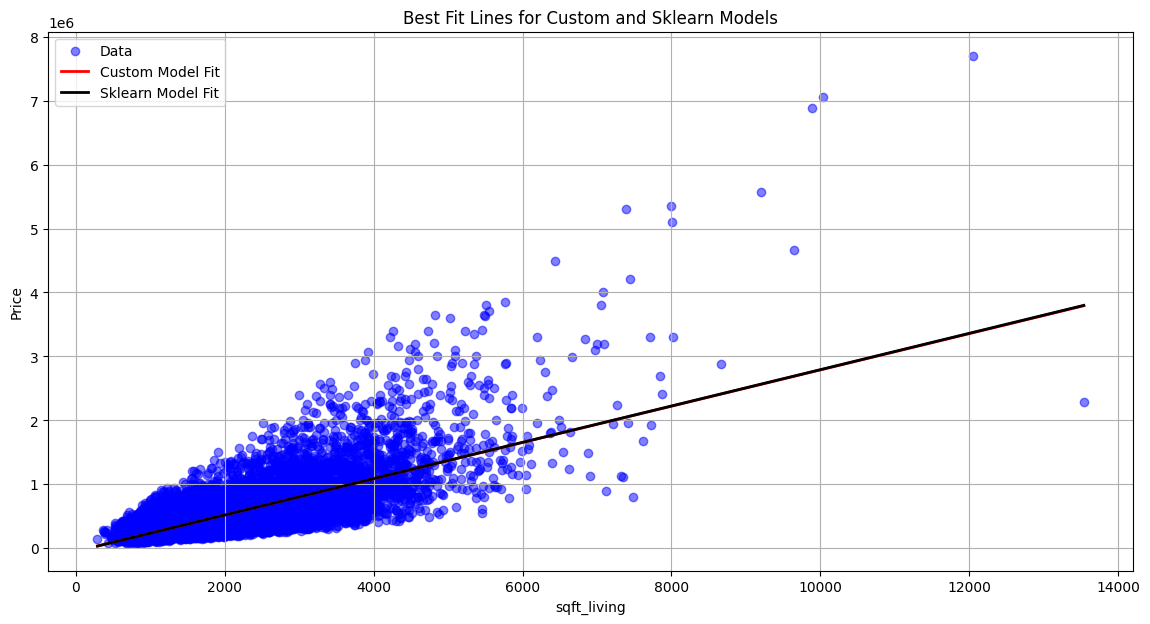

In [59]:

# Train both models
custom_model = MiniBatchSGDRegressor(learning_rate=0.001,n_iterations=100)
custom_model.fit(train_x_scaled1, train_y1)

sgd_model = SGDRegressor(
    max_iter=100,
    tol=1e-3,
    eta0=0.001,  # This is the learning rate

)
sgd_model.fit(train_x_scaled1, train_y1)

# Make predictions using the entire feature range for plotting
X_range1 = np.linspace(train_x_scaled1.min(), train_x_scaled1.max(), 100).reshape(-1, 1)
X_range_original1 = scaler.inverse_transform(X_range1)  # Transform back to original scale

# Predict using both models
custom_predictions = custom_model.predict(X_range1)
sklearn_predictions = sgd_model.predict(X_range1)

# Plotting
plt.figure(figsize=(14, 7))

# Plot the original data
plt.scatter(train_x1, train_y1, color='blue', label='Data', alpha=0.5)

# Plot the best fit lines
plt.plot(X_range_original1, custom_predictions, color='red', label='Custom Model Fit', linewidth=2)
plt.plot(X_range_original1, sklearn_predictions, color='black', label='Sklearn Model Fit', linewidth=2)

plt.xlabel(feature)
plt.ylabel('Price')
plt.title('Best Fit Lines for Custom and Sklearn Models')
plt.legend()
plt.grid(True)
plt.show()